In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib

# %matplotlib inline

Моя задача состоит в классификации пульсаров. Пульсар — космический источник радио- (радиопульсар), оптического (оптический пульсар), рентгеновского (рентгеновский пульсар) и/или гамма- (гамма-пульсар) излучений, приходящих на Землю в виде периодических всплесков (импульсов). Согласно доминирующей астрофизической модели, пульсары представляют собой вращающиеся нейтронные звёзды с магнитным полем, которое наклонено к оси вращения, что вызывает модуляцию приходящего на Землю излучения.

Attribute Information:

Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

    Mean of the integrated profile.
    Standard deviation of the integrated profile.
    Excess kurtosis of the integrated profile.
    Skewness of the integrated profile.
    Mean of the DM-SNR curve.
    Standard deviation of the DM-SNR curve.
    Excess kurtosis of the DM-SNR curve.
    Skewness of the DM-SNR curve.
    Class


In [2]:
data = pd.read_csv('pulsar_stars.csv', sep = ',')

In [3]:
data

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


# Статистические характеристики данных

In [5]:
data.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [6]:
data.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

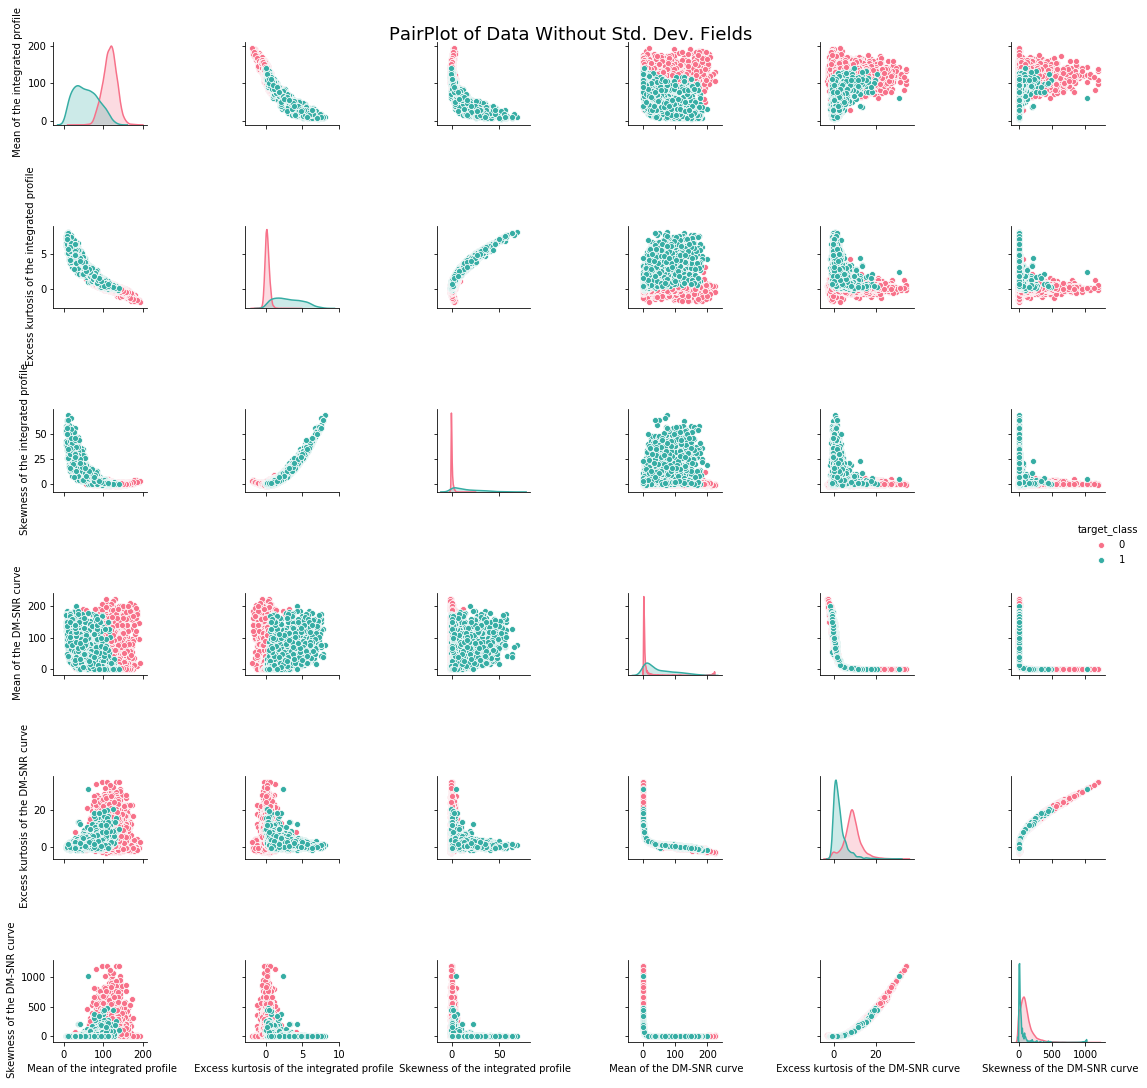

In [7]:
sn.pairplot(data=data,
            palette="husl",
            hue="target_class",
            vars=[" Mean of the integrated profile",
                  " Excess kurtosis of the integrated profile",
                  " Skewness of the integrated profile",
                  " Mean of the DM-SNR curve",
                  " Excess kurtosis of the DM-SNR curve",
                  " Skewness of the DM-SNR curve"])

plt.suptitle("PairPlot of Data Without Std. Dev. Fields",fontsize=18)

plt.tight_layout()
plt.show()

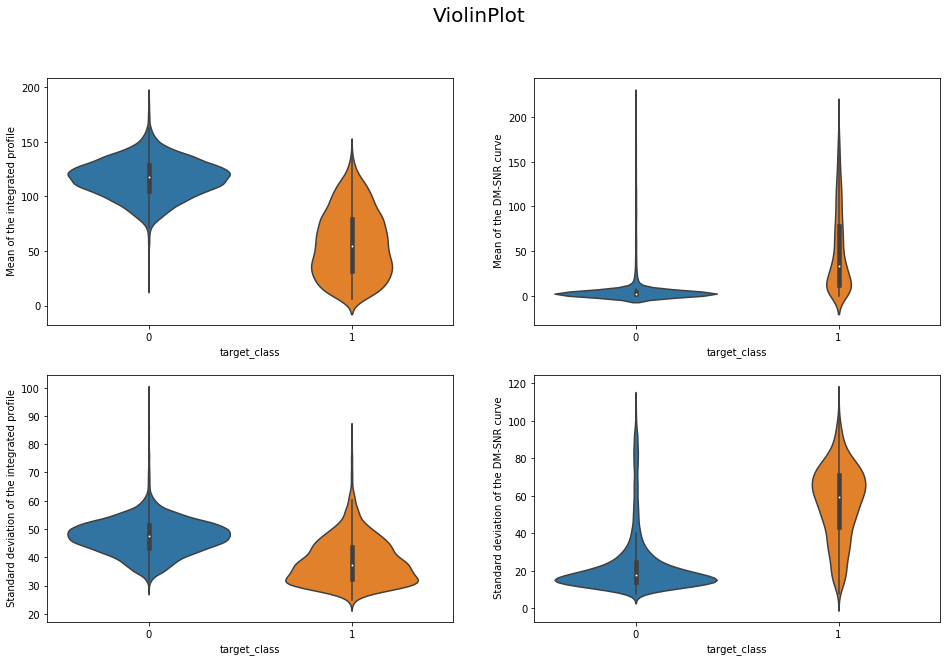

In [8]:
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
sn.violinplot(data=data,y=" Mean of the integrated profile",x="target_class")

plt.subplot(2,2,2)
sn.violinplot(data=data,y=" Mean of the DM-SNR curve",x="target_class")

plt.subplot(2,2,3)
sn.violinplot(data=data,y=" Standard deviation of the integrated profile",x="target_class")

plt.subplot(2,2,4)
sn.violinplot(data=data,y=" Standard deviation of the DM-SNR curve",x="target_class")


plt.suptitle("ViolinPlot",fontsize=20)

plt.show()

# Гистограммы распределений признаков

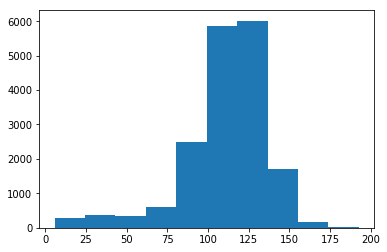

In [9]:
plt.hist(data[data.columns[0]])
pass

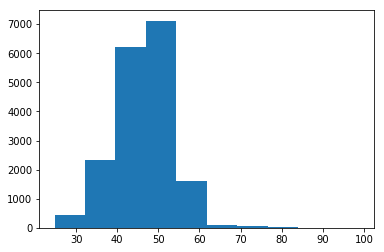

In [10]:
plt.hist(data[data.columns[1]])
pass

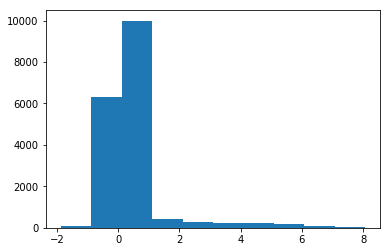

In [11]:
plt.hist(data[data.columns[2]])
pass

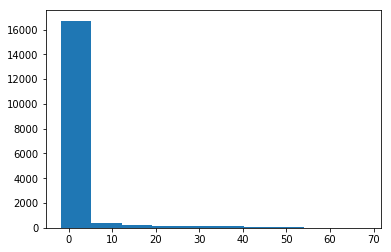

In [12]:
plt.hist(data[data.columns[3]])
pass

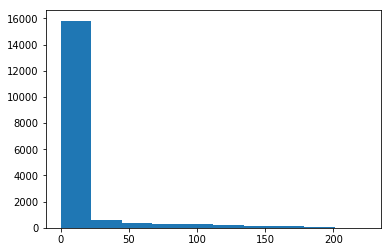

In [13]:
plt.hist(data[data.columns[4]])
pass

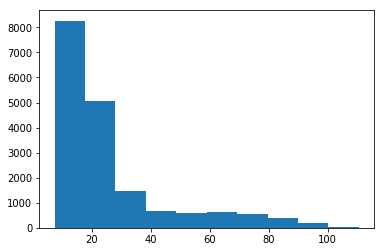

In [14]:
plt.hist(data[data.columns[5]])
pass

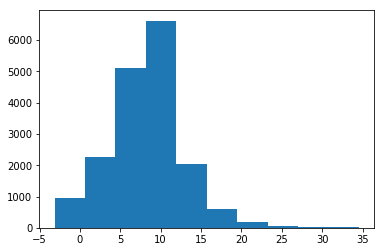

In [15]:
plt.hist(data[data.columns[6]])
pass

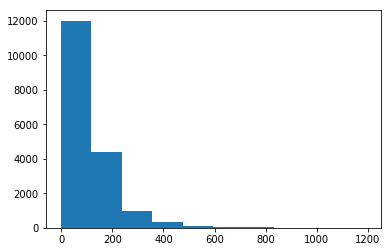

In [16]:
plt.hist(data[data.columns[7]])
pass

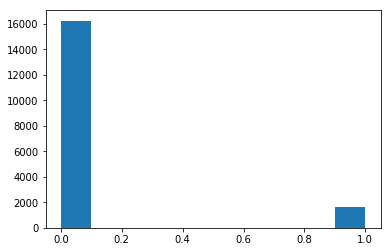

In [17]:
plt.hist(data[data.columns[8]])
pass

# Корреляционная матрица

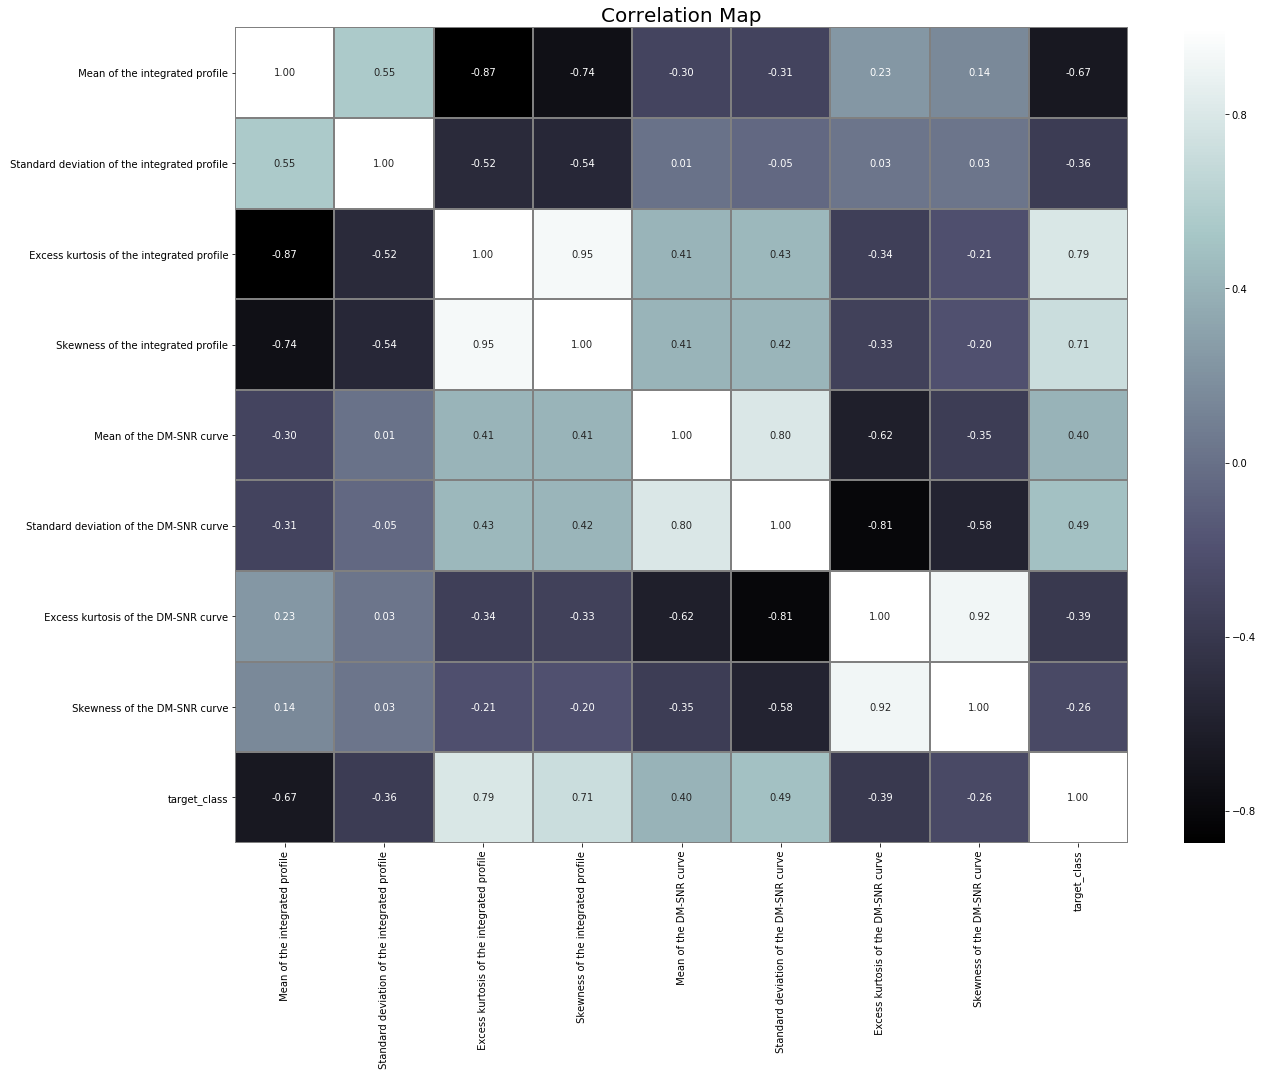

In [18]:
plt.figure(figsize=(20,15))
sn.heatmap(data=data.corr(),annot=True,cmap="bone",linewidths=1,fmt=".2f",linecolor="gray")
plt.title("Correlation Map",fontsize=20)
plt.show()

# Препроцессинг

In [19]:
X = data.drop(['target_class'], axis = 1)

In [20]:
y = data['target_class']

In [21]:
X = sk.preprocessing.scale(X)

In [22]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7
count,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04
mean,-1.683261e-16,-3.437982e-16,5.716737e-17,1.270386e-17,-5.399140e-17,2.858368e-17,4.382831e-16,3.811158e-17
std,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00
min,-4.103640e+00,-3.182449e+00,-2.212262e+00,-5.775478e-01,-4.207776e-01,-9.736032e-01,-2.539483e+00,-1.003034e+00
25%,-3.956882e-01,-6.098955e-01,-4.236418e-01,-3.175961e-01,-3.627611e-01,-6.106403e-01,-5.597136e-01,-6.562405e-01
50%,1.558601e-01,5.815398e-02,-2.392997e-01,-2.548046e-01,-3.329443e-01,-4.039644e-01,2.884145e-02,-2.046083e-01
75%,6.239604e-01,6.537588e-01,-4.259430e-03,-1.365972e-01,-2.426074e-01,1.079397e-01,5.324947e-01,3.234543e-01
max,3.178564e+00,7.632529e+00,7.134956e+00,1.075456e+01,7.151778e+00,4.330538e+00,5.822567e+00,1.019742e+01


# Разбиение на тест и трейн

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
print(model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')


# Результат на тесте

In [136]:
expected = y_test
predicted = model.predict(X_test)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3259
           1       0.91      0.86      0.89       321

   micro avg       0.98      0.98      0.98      3580
   macro avg       0.95      0.93      0.94      3580
weighted avg       0.98      0.98      0.98      3580

[[3233   26]
 [  44  277]]


In [137]:
from sklearn.metrics import roc_auc_score

In [138]:
print(roc_auc_score(expected,model.predict_proba(X_test)[:,1]))

0.9538168446066917


# Результат на трейне

In [139]:
expected = y_train
predicted = model.predict(X_train)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13000
           1       0.95      0.87      0.91      1318

   micro avg       0.98      0.98      0.98     14318
   macro avg       0.97      0.93      0.95     14318
weighted avg       0.98      0.98      0.98     14318

[[12939    61]
 [  174  1144]]


In [140]:
print(roc_auc_score(expected,model.predict_proba(X_train)[:,1]))

0.9977825084627058


Судя по значениям метрик, данные очень хорошие, и даже дисбаланс классов не может внести достаточную помеху для классификации. А также имеет место небольшое переобучение.

In [141]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
print(model)
expected = y_test
predicted = model.predict(X_test)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3259
           1       0.94      0.82      0.87       321

   micro avg       0.98      0.98      0.98      3580
   macro avg       0.96      0.91      0.93      3580
weighted avg       0.98      0.98      0.98      3580

[[3241   18]
 [  58  263]]


/home/hessus/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [142]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
print(model)
expected = y_test
predicted = model.predict(X_test)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3259
           1       0.66      0.86      0.75       321

   micro avg       0.95      0.95      0.95      3580
   macro avg       0.82      0.91      0.86      3580
weighted avg       0.96      0.95      0.95      3580

[[3116  143]
 [  45  276]]


# PCA

Берем 2 компоненты и строим график

In [143]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)

In [144]:
decomposed_X = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

decomposed_trainX, decomposed_testX, Y_train, Y_test = train_test_split(decomposed_X, y, test_size = 0.8, random_state = 42)

[0.52 0.27]


У этих 2 компонент довольно высокая объясненная вариация

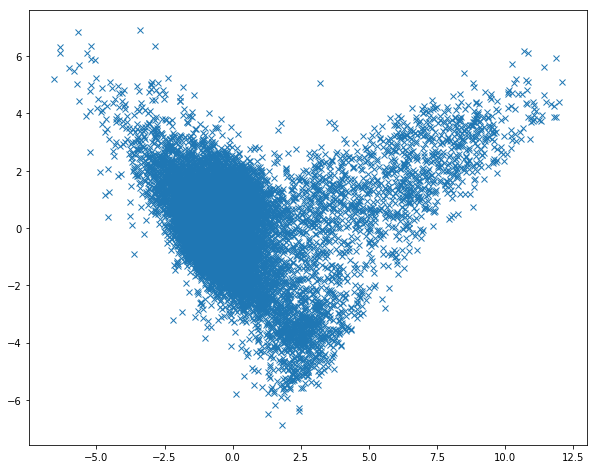

In [145]:
plt.figure(figsize=(10,8))
plt.plot(decomposed_X[:,0], decomposed_X[:,1], 'x')
plt.show()

In [146]:
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors=3)
model.fit(decomposed_trainX, Y_train)
pred = model.predict(decomposed_testX)
print(accuracy_score(Y_test, pred))

0.9681542007123403


Из высоких значений объясненной вариации получаем высокий результат, также это связано с качеством данных

In [147]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

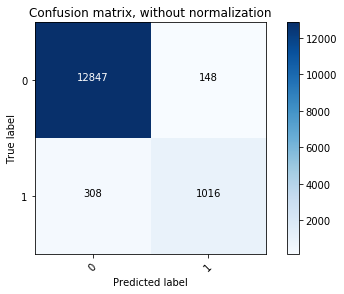

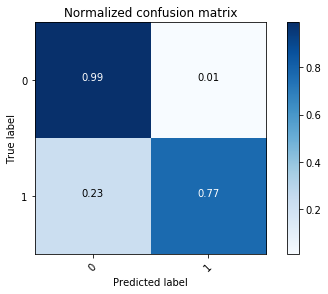

In [148]:
cnf_matrix = confusion_matrix(testY, pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [149]:
pca = PCA(n_components=8, random_state=42)
decomposed_X = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

[0.52 0.27 0.1  0.06 0.03 0.02 0.   0.  ]


По моему субьективному мнению, в данном случае достаточно взять 3 компонынты, это связано с тем, что разница объясненной вариации между 3 и 4 компонентами достаточно велика

[0.52 0.27 0.1 ]
0.9766045114882325


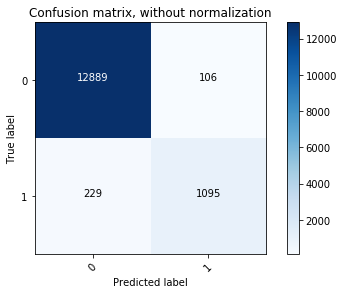

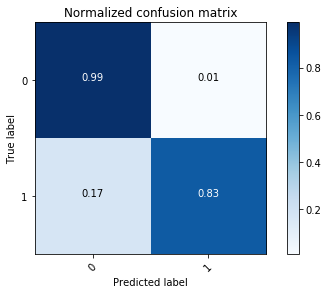

In [150]:
pca = PCA(n_components=3, random_state=42)
decomposed_data_X = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

decomposed_trainX, decomposed_testX, Y_train, Y_test = train_test_split(decomposed_X, y, test_size = 0.8, random_state = 42)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(decomposed_trainX, Y_train)
pred = model.predict(decomposed_testX)
print(accuracy_score(Y_test, pred))

cnf_matrix = confusion_matrix(Y_test, pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [152]:
errors = dict()
for n_comp in range(8,0,-1):
    pca = PCA(n_components=n_comp, random_state=42)
    decomposed_X = pca.fit_transform(X)

    decomposed_trainX, decomposed_testX, Y_train, Y_test = train_test_split(decomposed_X, y, test_size = 0.8, random_state = 42)

    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(decomposed_trainX, Y_train)
    pred = model.predict(decomposed_testX)
    errors[n_comp] = accuracy_score(Y_test, pred)
    print(errors[n_comp])



0.9766045114882325
0.9767441860465116
0.9761854878133948
0.9763949996508136
0.9748585795097423
0.9741602067183462
0.9681542007123403
0.9558628395837698


На кнн удаление компонент влияет не очень сильно, например в начале ошибка колеблется при удалении компонент

In [153]:
from sklearn.svm import SVC
model = SVC(gamma='auto')
model.fit(decomposed_trainX, Y_train)
pred = model.predict(decomposed_testX)
print(accuracy_score(Y_test, pred))

0.9594943780990293


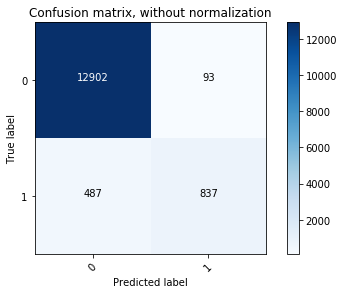

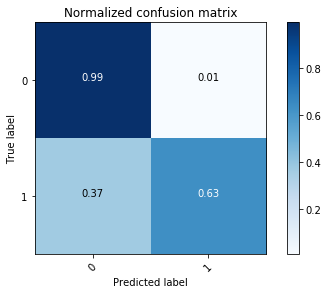

In [154]:
cnf_matrix = confusion_matrix(testY, pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [155]:
errors = dict()
for n_comp in range(8,0,-1):
    pca = PCA(n_components=n_comp, random_state=42)
    decomposed_X = pca.fit_transform(X)

    decomposed_trainX, decomposed_testX, Y_train, Y_test = train_test_split(decomposed_X, y, test_size = 0.8, random_state = 42)

    model = SVC(gamma='auto')
    model.fit(decomposed_trainX, Y_train)
    pred = model.predict(decomposed_testX)
    errors[n_comp] = accuracy_score(Y_test, pred)
    print(errors[n_comp])

0.978629792583281
0.978629792583281
0.9783504434667225
0.9777917452336057
0.9770235351630701
0.9770933724422096
0.9736015084852294
0.9594943780990293


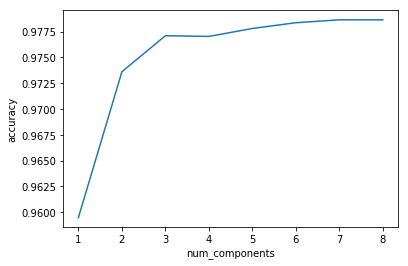

In [156]:
plt.plot(list(errors.keys()), list(errors.values()))
plt.ylabel('accuracy')
plt.xlabel('num_components')
plt.show()

Исходя из графика можно сказать, что 8 компонент, это лучший вариант, но в случае, если объем данных будет очень большим можно остановиться на 3 компонентах

# Полносвязная сеть

In [112]:
from sklearn.neural_network import MLPClassifier

## Однослойная

In [113]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [114]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [115]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.01746053918144992 0.01759776536312849


In [116]:
print(mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

0.98253946081855 0.9824022346368715


In [117]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[3238   42]
 [  21  279]]


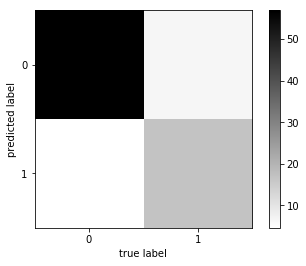

In [118]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

In [119]:
print(confusion_matrix(y_train_pred, y_train))

[[12925   175]
 [   75  1143]]


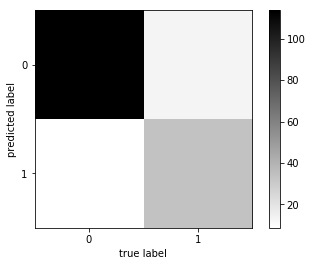

In [120]:
M = confusion_matrix(y_train_pred, y_train)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

Судя по ошибкам на обучающей и тестовой выборках,а также по матрицам ошибок можно сказать, что переобучение отутствует, ибо оба результата крайне близки друг к другу.

### Подбор альфа

In [88]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

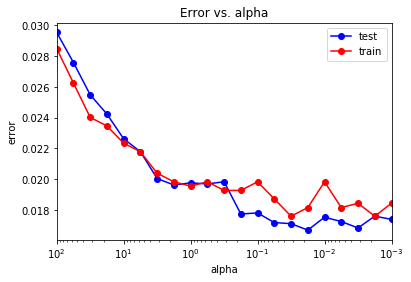

In [89]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

В целом заметна тенденция, что с уменьшением параметра альфа растет точность как на обучающей так и на тестовой выборках

In [90]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.016692275457466127 0.01759776536312849


In [91]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.00177828 0.03162278]


In [92]:
alpha_opt = alpha_opt[0]

In [93]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.017600223494901524
0.01759776536312849


In [94]:
print(confusion_matrix(y_test_pred, y_test))

[[3241   45]
 [  18  276]]


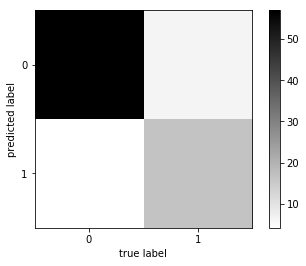

In [95]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

С помощью подбора альфа удалось улучшить распознавание 2 класса.

In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3259
           1       0.94      0.86      0.90       321

   micro avg       0.98      0.98      0.98      3580
   macro avg       0.96      0.93      0.94      3580
weighted avg       0.98      0.98      0.98      3580



### Перебор количества нейронов в слое

In [97]:
neurons_counts = [i for i in range(80,101)]
test_err = []
train_err = []
for neurons_count in neurons_counts:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neurons_count,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

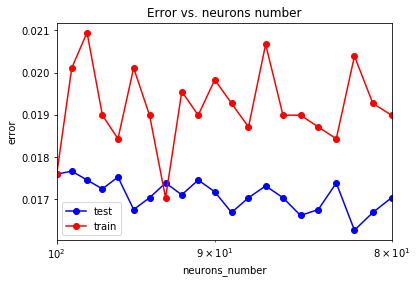

In [98]:
plt.semilogx(neurons_counts, train_err, 'b-o', label = 'test')
plt.semilogx(neurons_counts, test_err, 'r-o', label = 'train')
plt.xlim([np.max(neurons_counts), np.min(neurons_counts)])
plt.title('Error vs. neurons number')
plt.xlabel('neurons_number')
plt.ylabel('error')
plt.legend()
pass

Четкую зависимость выявить сложно, в целом я думаю, это связано с высоким качеством данных, поэтому данный пример не является очень показательным.

In [99]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.01627322251711133 0.017039106145251396


In [100]:
neurons_counts = np.array(neurons_counts)
number_opt = neurons_counts[test_err == min_test_err]
print(number_opt)

[93]


# Два слоя

In [121]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100, 2), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [122]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [123]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.019206593099594917 0.019273743016759777


In [124]:
print(mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

0.9807934069004051 0.9807262569832402


In [125]:
print(confusion_matrix(y_test_pred, y_test))

[[3236   46]
 [  23  275]]


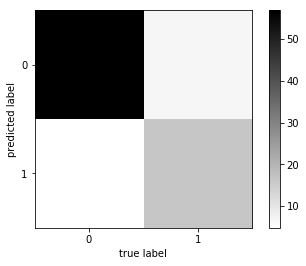

In [127]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

In [126]:
print(confusion_matrix(y_train_pred, y_train))

[[12912   187]
 [   88  1131]]


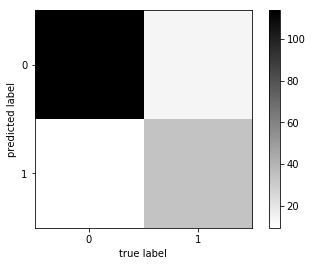

In [128]:
M = confusion_matrix(y_train_pred, y_train)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

Персептрон с большим количеством слоев показывает худшие результаты, это может быть связано с тем, что в связи с высоким качеством данных излишнее усложнение модели делает только хуже.